## Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, KFold 
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
# Import module
from scipy.io import arff
from matplotlib import style
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

In [2]:
#importing libraries
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.feature_selection import RFECV,SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, SVC, LinearSVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from IPython.core.display import display, HTML

In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.




# Some Information about the features :

    1.Age(numerical)

  	  	age in years
 	2.Blood Pressure(numerical)
	       	bp in mm/Hg
 	3.Specific Gravity(nominal)
	  	sg - (1.005,1.010,1.015,1.020,1.025)
 	4.Albumin(nominal)
		al - (0,1,2,3,4,5)
 	5.Sugar(nominal)
		su - (0,1,2,3,4,5)
 	6.Red Blood Cells(nominal)
		rbc - (normal,abnormal)
 	7.Pus Cell (nominal)
		pc - (normal,abnormal)
 	8.Pus Cell clumps(nominal)
		pcc - (present,notpresent)
 	9.Bacteria(nominal)
		ba  - (present,notpresent)
 	10.Blood Glucose Random(numerical)		
		bgr in mgs/dl
 	11.Blood Urea(numerical)	
		bu in mgs/dl
 	12.Serum Creatinine(numerical)	
		sc in mgs/dl
 	13.Sodium(numerical)
		sod in mEq/L
 	14.Potassium(numerical)	
		pot in mEq/L
 	15.Hemoglobin(numerical)
		hemo in gms
 	16.Packed  Cell Volume(numerical)
 	17.White Blood Cell Count(numerical)
		wc in cells/cumm
 	18.Red Blood Cell Count(numerical)	
		rc in millions/cmm
 	19.Hypertension(nominal)	
		htn - (yes,no)
 	20.Diabetes Mellitus(nominal)	
		dm - (yes,no)
 	21.Coronary Artery Disease(nominal)
		cad - (yes,no)
 	22.Appetite(nominal)	
		appet - (good,poor)
 	23.Pedal Edema(nominal)
		pe - (yes,no)	
 	24.Anemia(nominal)
		ane - (yes,no)
 	25.Class (nominal)		
		class - (ckd,notckd)

In [4]:
data = []
with open('chronic_kidney_disease.arff', "r") as f:
    for line in f:
        line = line.replace('\n', '')
        data.append(line.split(','))


names = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
         'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
         'class', 'no_name']
    
df = pd.DataFrame(data[29:], columns=names)

In [5]:
df.head()

age  bp     sg al su     rbc        pc         pcc          ba  bgr  ...  \
0  48  80  1.020  1  0       ?    normal  notpresent  notpresent  121  ...   
1   7  50  1.020  4  0       ?    normal  notpresent  notpresent    ?  ...   
2  62  80  1.010  2  3  normal    normal  notpresent  notpresent  423  ...   
3  48  70  1.005  4  0  normal  abnormal     present  notpresent  117  ...   
4  51  80  1.010  2  0  normal    normal  notpresent  notpresent  106  ...   

   wbcc rbcc  htn   dm cad appet   pe  ane class no_name  
0  7800  5.2  yes  yes  no  good   no   no   ckd    None  
1  6000    ?   no   no  no  good   no   no   ckd    None  
2  7500    ?   no  yes  no  poor   no  yes   ckd    None  
3  6700  3.9  yes   no  no  poor  yes  yes   ckd    None  
4  7300  4.6   no   no  no  good   no   no   ckd    None  

[5 rows x 26 columns]

## Data Renaming

In [6]:
cols_names={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"haemoglobin",
          "pcv":"packed_cell_volume",
          "wbcc":"white_blood_cell_count",
          "rbcc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

df.rename(columns=cols_names, inplace=True)

In [7]:
df.head()

age blood_pressure specific_gravity albumin sugar red_blood_cells  pus_cell  \
0  48             80            1.020       1     0               ?    normal   
1   7             50            1.020       4     0               ?    normal   
2  62             80            1.010       2     3          normal    normal   
3  48             70            1.005       4     0          normal  abnormal   
4  51             80            1.010       2     0          normal    normal   

  pus_cell_clumps    bacteria blood_glucose_random  ...  \
0      notpresent  notpresent                  121  ...   
1      notpresent  notpresent                    ?  ...   
2      notpresent  notpresent                  423  ...   
3         present  notpresent                  117  ...   
4      notpresent  notpresent                  106  ...   

  white_blood_cell_count red_blood_cell_count hypertension diabetes_mellitus  \
0                   7800                  5.2          yes               yes   
1                   6000                    ?           no                no   
2                   7500                    ?           no               yes   
3                   6700                  3.9          yes                no   
4                   7300                  4.6           no                no   

  coronary_artery_disease appetite pedal_edema anemia class no_name  
0                      no     good          no     no   ckd    None  
1                      no     good          no     no   ckd    None  
2                      no     poor          no    yes   ckd    None  
3                      no     poor         yes    yes   ckd    None  
4                      no     good          no     no   ckd    None  

[5 rows x 26 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      401 non-null    object
 1   blood_pressure           400 non-null    object
 2   specific_gravity         400 non-null    object
 3   albumin                  400 non-null    object
 4   sugar                    400 non-null    object
 5   red_blood_cells          400 non-null    object
 6   pus_cell                 400 non-null    object
 7   pus_cell_clumps          400 non-null    object
 8   bacteria                 400 non-null    object
 9   blood_glucose_random     400 non-null    object
 10  blood_urea               400 non-null    object
 11  serum_creatinine         400 non-null    object
 12  sodium                   400 non-null    object
 13  potassium                400 non-null    object
 14  haemoglobin              400 non-null    o

## Missing Values

Okay, so we notice the existance of "?" in all of the features, We're gonna assume that those are missing data, so we'll convert them to NaN values so it wont disrupt plots. 

In [9]:
df=df.replace("?", np.nan)

In [10]:
#df=df.replace("None", np.nan)

In [11]:
df.head()

age blood_pressure specific_gravity albumin sugar red_blood_cells  pus_cell  \
0  48             80            1.020       1     0             NaN    normal   
1   7             50            1.020       4     0             NaN    normal   
2  62             80            1.010       2     3          normal    normal   
3  48             70            1.005       4     0          normal  abnormal   
4  51             80            1.010       2     0          normal    normal   

  pus_cell_clumps    bacteria blood_glucose_random  ...  \
0      notpresent  notpresent                  121  ...   
1      notpresent  notpresent                  NaN  ...   
2      notpresent  notpresent                  423  ...   
3         present  notpresent                  117  ...   
4      notpresent  notpresent                  106  ...   

  white_blood_cell_count red_blood_cell_count hypertension diabetes_mellitus  \
0                   7800                  5.2          yes               yes   
1                   6000                  NaN           no                no   
2                   7500                  NaN           no               yes   
3                   6700                  3.9          yes                no   
4                   7300                  4.6           no                no   

  coronary_artery_disease appetite pedal_edema anemia class no_name  
0                      no     good          no     no   ckd    None  
1                      no     good          no     no   ckd    None  
2                      no     poor          no    yes   ckd    None  
3                      no     poor         yes    yes   ckd    None  
4                      no     good          no     no   ckd    None  

[5 rows x 26 columns]

In [12]:
df.isna().sum()

age                          9
blood_pressure              13
specific_gravity            48
albumin                     47
sugar                       50
red_blood_cells            153
pus_cell                    66
pus_cell_clumps              5
bacteria                     5
blood_glucose_random        45
blood_urea                  20
serum_creatinine            18
sodium                      88
potassium                   89
haemoglobin                 53
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 3
diabetes_mellitus            3
coronary_artery_disease      3
appetite                     2
pedal_edema                  2
anemia                       2
class                        1
no_name                    398
dtype: int64

In [13]:
missing_values=df.isna().sum().sort_values(ascending=False)
print(missing_values)

no_name                    398
red_blood_cells            153
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   89
sodium                      88
packed_cell_volume          71
pus_cell                    66
haemoglobin                 53
sugar                       50
specific_gravity            48
albumin                     47
blood_glucose_random        45
blood_urea                  20
serum_creatinine            18
blood_pressure              13
age                          9
bacteria                     5
pus_cell_clumps              5
hypertension                 3
diabetes_mellitus            3
coronary_artery_disease      3
appetite                     2
pedal_edema                  2
anemia                       2
class                        1
dtype: int64


In [14]:
def missing(dff):
    print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))


missing(df)

no_name                    99.25
red_blood_cells            38.15
red_blood_cell_count       32.67
white_blood_cell_count     26.43
potassium                  22.19
sodium                     21.95
packed_cell_volume         17.71
pus_cell                   16.46
haemoglobin                13.22
sugar                      12.47
specific_gravity           11.97
albumin                    11.72
blood_glucose_random       11.22
blood_urea                  4.99
serum_creatinine            4.49
blood_pressure              3.24
age                         2.24
bacteria                    1.25
pus_cell_clumps             1.25
hypertension                0.75
diabetes_mellitus           0.75
coronary_artery_disease     0.75
appetite                    0.50
pedal_edema                 0.50
anemia                      0.50
class                       0.25
dtype: float64


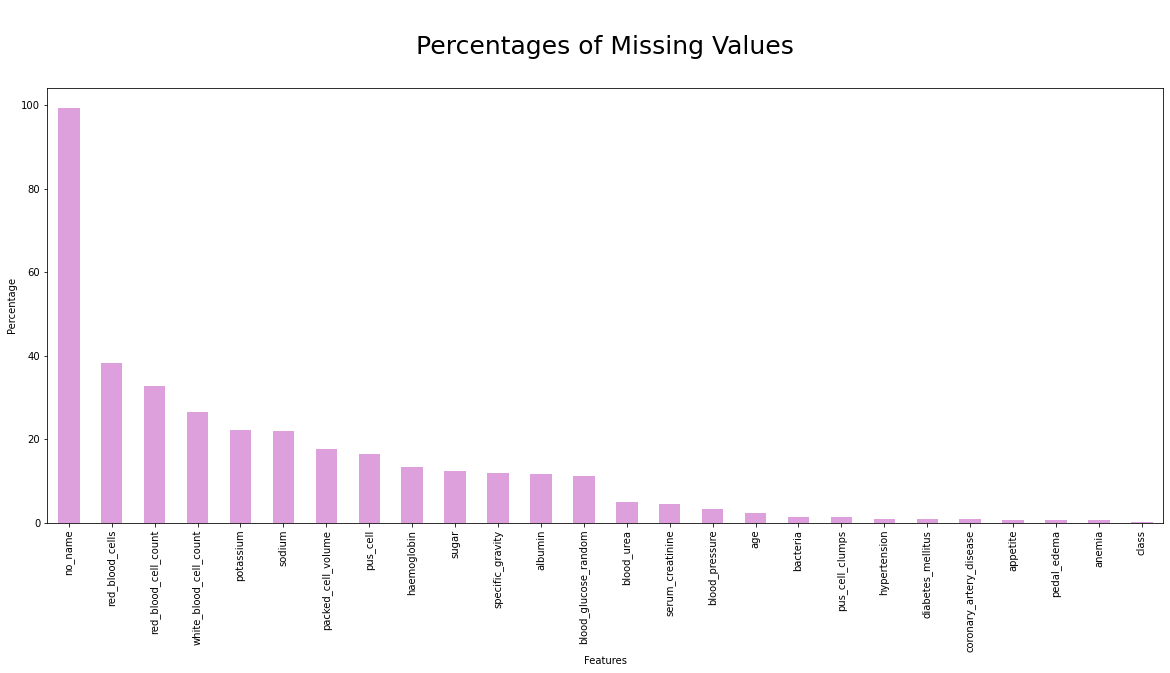

In [15]:
plt.figure(figsize=(20,8))
(round(missing_values*100/len(df),2)).plot(kind="bar", color="plum") 
plt.title('\nPercentages of Missing Values\n', fontsize=25)
plt.ylabel("Percentage")
plt.xlabel("Features")
plt.show()

## Deleting unnecessary features

In [16]:
df.nunique()

age                         77
blood_pressure              10
specific_gravity             5
albumin                      6
sugar                        6
red_blood_cells              2
pus_cell                     2
pus_cell_clumps              2
bacteria                     2
blood_glucose_random       146
blood_urea                 118
serum_creatinine            86
sodium                      34
potassium                   42
haemoglobin                118
packed_cell_volume          44
white_blood_cell_count      92
red_blood_cell_count        49
hypertension                 2
diabetes_mellitus            6
coronary_artery_disease      3
appetite                     3
pedal_edema                  3
anemia                       2
class                        4
no_name                      2
dtype: int64

In [17]:
noname_list = df['no_name'].tolist()
noname_list

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '',
 None,
 None,
 '',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 No

In [18]:
df=df.drop(['no_name'],axis=1)

## Transforming Data 

In [19]:
#tonumeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['blood_pressure'] = pd.to_numeric(df['blood_pressure'], errors='coerce')
df['specific_gravity'] = pd.to_numeric(df['specific_gravity'], errors='coerce')
df['albumin'] = pd.to_numeric(df['albumin'], errors='coerce')
df['sugar'] = pd.to_numeric(df['sugar'], errors='coerce')
df['blood_glucose_random'] = pd.to_numeric(df['blood_glucose_random'], errors='coerce')
df['blood_urea'] = pd.to_numeric(df['blood_urea'], errors='coerce')
df['serum_creatinine'] = pd.to_numeric(df['serum_creatinine'], errors='coerce')
df['sodium'] = pd.to_numeric(df['sodium'], errors='coerce')
df['potassium'] = pd.to_numeric(df['potassium'], errors='coerce')
df['haemoglobin'] = pd.to_numeric(df['haemoglobin'], errors='coerce')
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [21]:
df.describe()

age  blood_pressure  specific_gravity     albumin       sugar  \
count  391.000000      388.000000        353.000000  354.000000  351.000000   
mean    51.483376       76.469072          1.017408    1.016949    0.450142   
std     17.169714       13.683637          0.005717    1.352679    1.099191   
min      2.000000       50.000000          1.005000    0.000000    0.000000   
25%     42.000000       70.000000          1.010000    0.000000    0.000000   
50%     55.000000       80.000000          1.020000    0.000000    0.000000   
75%     64.500000       80.000000          1.020000    2.000000    0.000000   
max     90.000000      180.000000          1.025000    5.000000    5.000000   

       blood_glucose_random  blood_urea  serum_creatinine      sodium  \
count            356.000000  381.000000        383.000000  313.000000   
mean             148.036517   57.425722          3.072454  137.528754   
std               79.281714   50.503006          5.741126   10.408752   
min               22.000000    1.500000          0.400000    4.500000   
25%               99.000000   27.000000          0.900000  135.000000   
50%              121.000000   42.000000          1.300000  138.000000   
75%              163.000000   66.000000          2.800000  142.000000   
max              490.000000  391.000000         76.000000  163.000000   

        potassium  haemoglobin  packed_cell_volume  white_blood_cell_count  \
count  312.000000   348.000000          329.000000              294.000000   
mean     4.627244    12.526437           38.884498             8406.122449   
std      3.193904     2.912587            8.990105             2944.474190   
min      2.500000     3.100000            9.000000             2200.000000   
25%      3.800000    10.300000           32.000000             6500.000000   
50%      4.400000    12.650000           40.000000             8000.000000   
75%      4.900000    15.000000           45.000000             9800.000000   
max     47.000000    17.800000           54.000000            26400.000000   

       red_blood_cell_count  
count            269.000000  
mean               4.707435  
std                1.025323  
min                2.100000  
25%                3.900000  
50%                4.800000  
75%                5.400000  
max                8.000000

In [22]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']
print('numerical columns are \n',num_cols)
print('\n')
print('categorical columns are \n',cat_cols)

numerical columns are 
 ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


categorical columns are 
 ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'class']


In [23]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal' None] values

pus_cell has ['normal' 'abnormal' nan None] values

pus_cell_clumps has ['notpresent' 'present' nan None] values

bacteria has ['notpresent' 'present' nan None] values

hypertension has ['yes' 'no' nan None] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan '' None] values

coronary_artery_disease has ['no' 'yes' '\tno' nan None] values

appetite has ['good' 'poor' nan 'no' None] values

pedal_edema has ['no' 'yes' nan 'good' None] values

anemia has ['no' 'yes' nan None] values

class has ['ckd' 'ckd\t' 'notckd' 'no' None] values



In [24]:
df=df.replace("\tno", "no")
df=df.replace("\tyes", "yes")
df=df.replace(" yes", "yes")
df=df.replace("ckd\t", "ckd")
df=df.replace("", None)
df['pedal_edema']=df['pedal_edema'].replace("good", None)
df['class']=df['class'].replace("no",None)
df['appetite']=df['appetite'].replace("no",None)



In [25]:
for col in cat_cols:
    df[col]=df[col].replace(np.nan,None)

In [26]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal'] values

pus_cell_clumps has ['notpresent' 'present'] values

bacteria has ['notpresent' 'present'] values

hypertension has ['yes' 'no'] values

diabetes_mellitus has ['yes' 'no'] values

coronary_artery_disease has ['no' 'yes'] values

appetite has ['good' 'poor'] values

pedal_edema has ['no' 'yes'] values

anemia has ['no' 'yes'] values

class has ['ckd' 'notckd'] values



In [27]:
df.head()

age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0             NaN   
1   7.0            50.0             1.020      4.0    0.0             NaN   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  ...  \
0    normal      notpresent  notpresent                 121.0  ...   
1    normal      notpresent  notpresent                   NaN  ...   
2    normal      notpresent  notpresent                 423.0  ...   
3  abnormal         present  notpresent                 117.0  ...   
4    normal      notpresent  notpresent                 106.0  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   NaN   
2                31.0                  7500.0                   NaN   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0           yes                yes                       no      good   
1            no                 no                       no      good   
2            no                yes                       no      poor   
3           yes                 no                       no      poor   
4            no                 no                       no      good   

   pedal_edema anemia class  
0           no     no   ckd  
1           no     no   ckd  
2           no    yes   ckd  
3          yes    yes   ckd  
4           no     no   ckd  

[5 rows x 25 columns]

In [28]:
df.isnull().sum()

age                         10
blood_pressure              13
specific_gravity            48
albumin                     47
sugar                       50
red_blood_cells              2
pus_cell                     0
pus_cell_clumps              0
bacteria                     0
blood_glucose_random        45
blood_urea                  20
serum_creatinine            18
sodium                      88
potassium                   89
haemoglobin                 53
packed_cell_volume          72
white_blood_cell_count     107
red_blood_cell_count       132
hypertension                 0
diabetes_mellitus            0
coronary_artery_disease      0
appetite                     0
pedal_edema                  0
anemia                       0
class                        0
dtype: int64

## Handling missing values

#### 1- Categorical features

In [29]:
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [30]:
df.isnull().sum()

age                         10
blood_pressure              13
specific_gravity            48
albumin                     47
sugar                       50
red_blood_cells              0
pus_cell                     0
pus_cell_clumps              0
bacteria                     0
blood_glucose_random        45
blood_urea                  20
serum_creatinine            18
sodium                      88
potassium                   89
haemoglobin                 53
packed_cell_volume          72
white_blood_cell_count     107
red_blood_cell_count       132
hypertension                 0
diabetes_mellitus            0
coronary_artery_disease      0
appetite                     0
pedal_edema                  0
anemia                       0
class                        0
dtype: int64

In [31]:
df.head()

age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0          normal   
1   7.0            50.0             1.020      4.0    0.0          normal   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  ...  \
0    normal      notpresent  notpresent                 121.0  ...   
1    normal      notpresent  notpresent                   NaN  ...   
2    normal      notpresent  notpresent                 423.0  ...   
3  abnormal         present  notpresent                 117.0  ...   
4    normal      notpresent  notpresent                 106.0  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   NaN   
2                31.0                  7500.0                   NaN   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0           yes                yes                       no      good   
1            no                 no                       no      good   
2            no                yes                       no      poor   
3           yes                 no                       no      poor   
4            no                 no                       no      good   

   pedal_edema anemia class  
0           no     no   ckd  
1           no     no   ckd  
2           no    yes   ckd  
3          yes    yes   ckd  
4           no     no   ckd  

[5 rows x 25 columns]

#### 2- Numerical features

In [32]:
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

In [33]:
df.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [34]:
df.head(3)

age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  48.0            80.0              1.02      1.0    0.0          normal   
1   7.0            50.0              1.02      4.0    0.0          normal   
2  62.0            80.0              1.01      2.0    3.0          normal   

  pus_cell pus_cell_clumps    bacteria  blood_glucose_random  ...  \
0   normal      notpresent  notpresent            121.000000  ...   
1   normal      notpresent  notpresent            148.036517  ...   
2   normal      notpresent  notpresent            423.000000  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                44.0                  7800.0              5.200000   
1                38.0                  6000.0              4.707435   
2                31.0                  7500.0              4.707435   

   hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0           yes                yes                       no      good   
1            no                 no                       no      good   
2            no                yes                       no      poor   

   pedal_edema anemia class  
0           no     no   ckd  
1           no     no   ckd  
2           no    yes   ckd  

[3 rows x 25 columns]

## Outliers


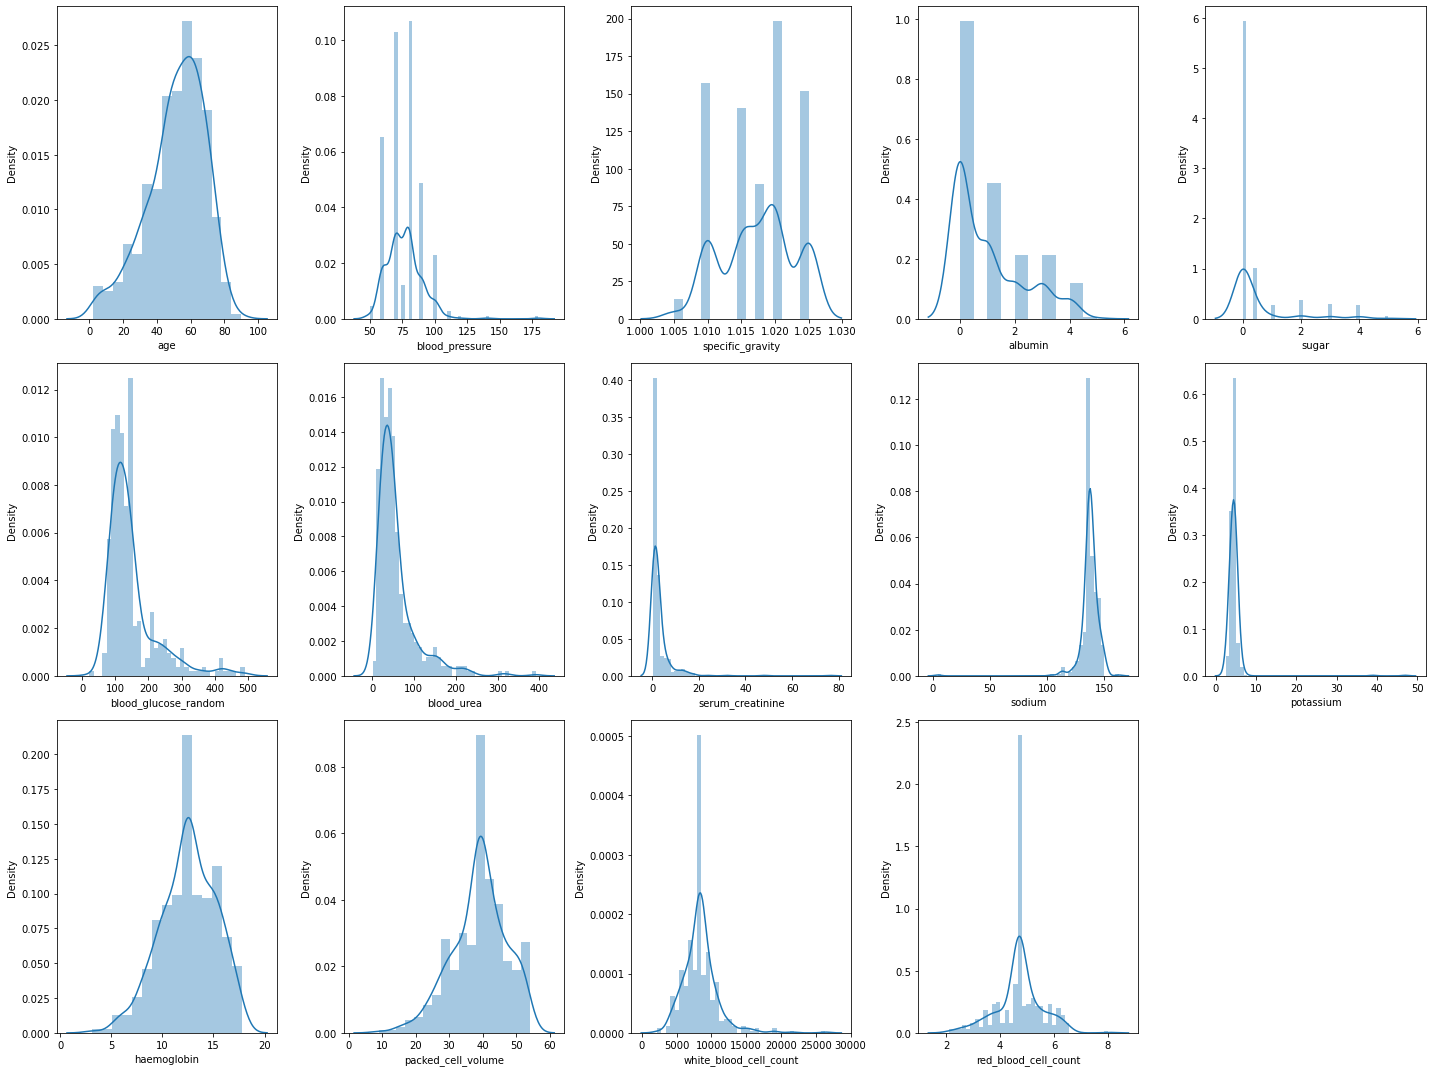

In [35]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

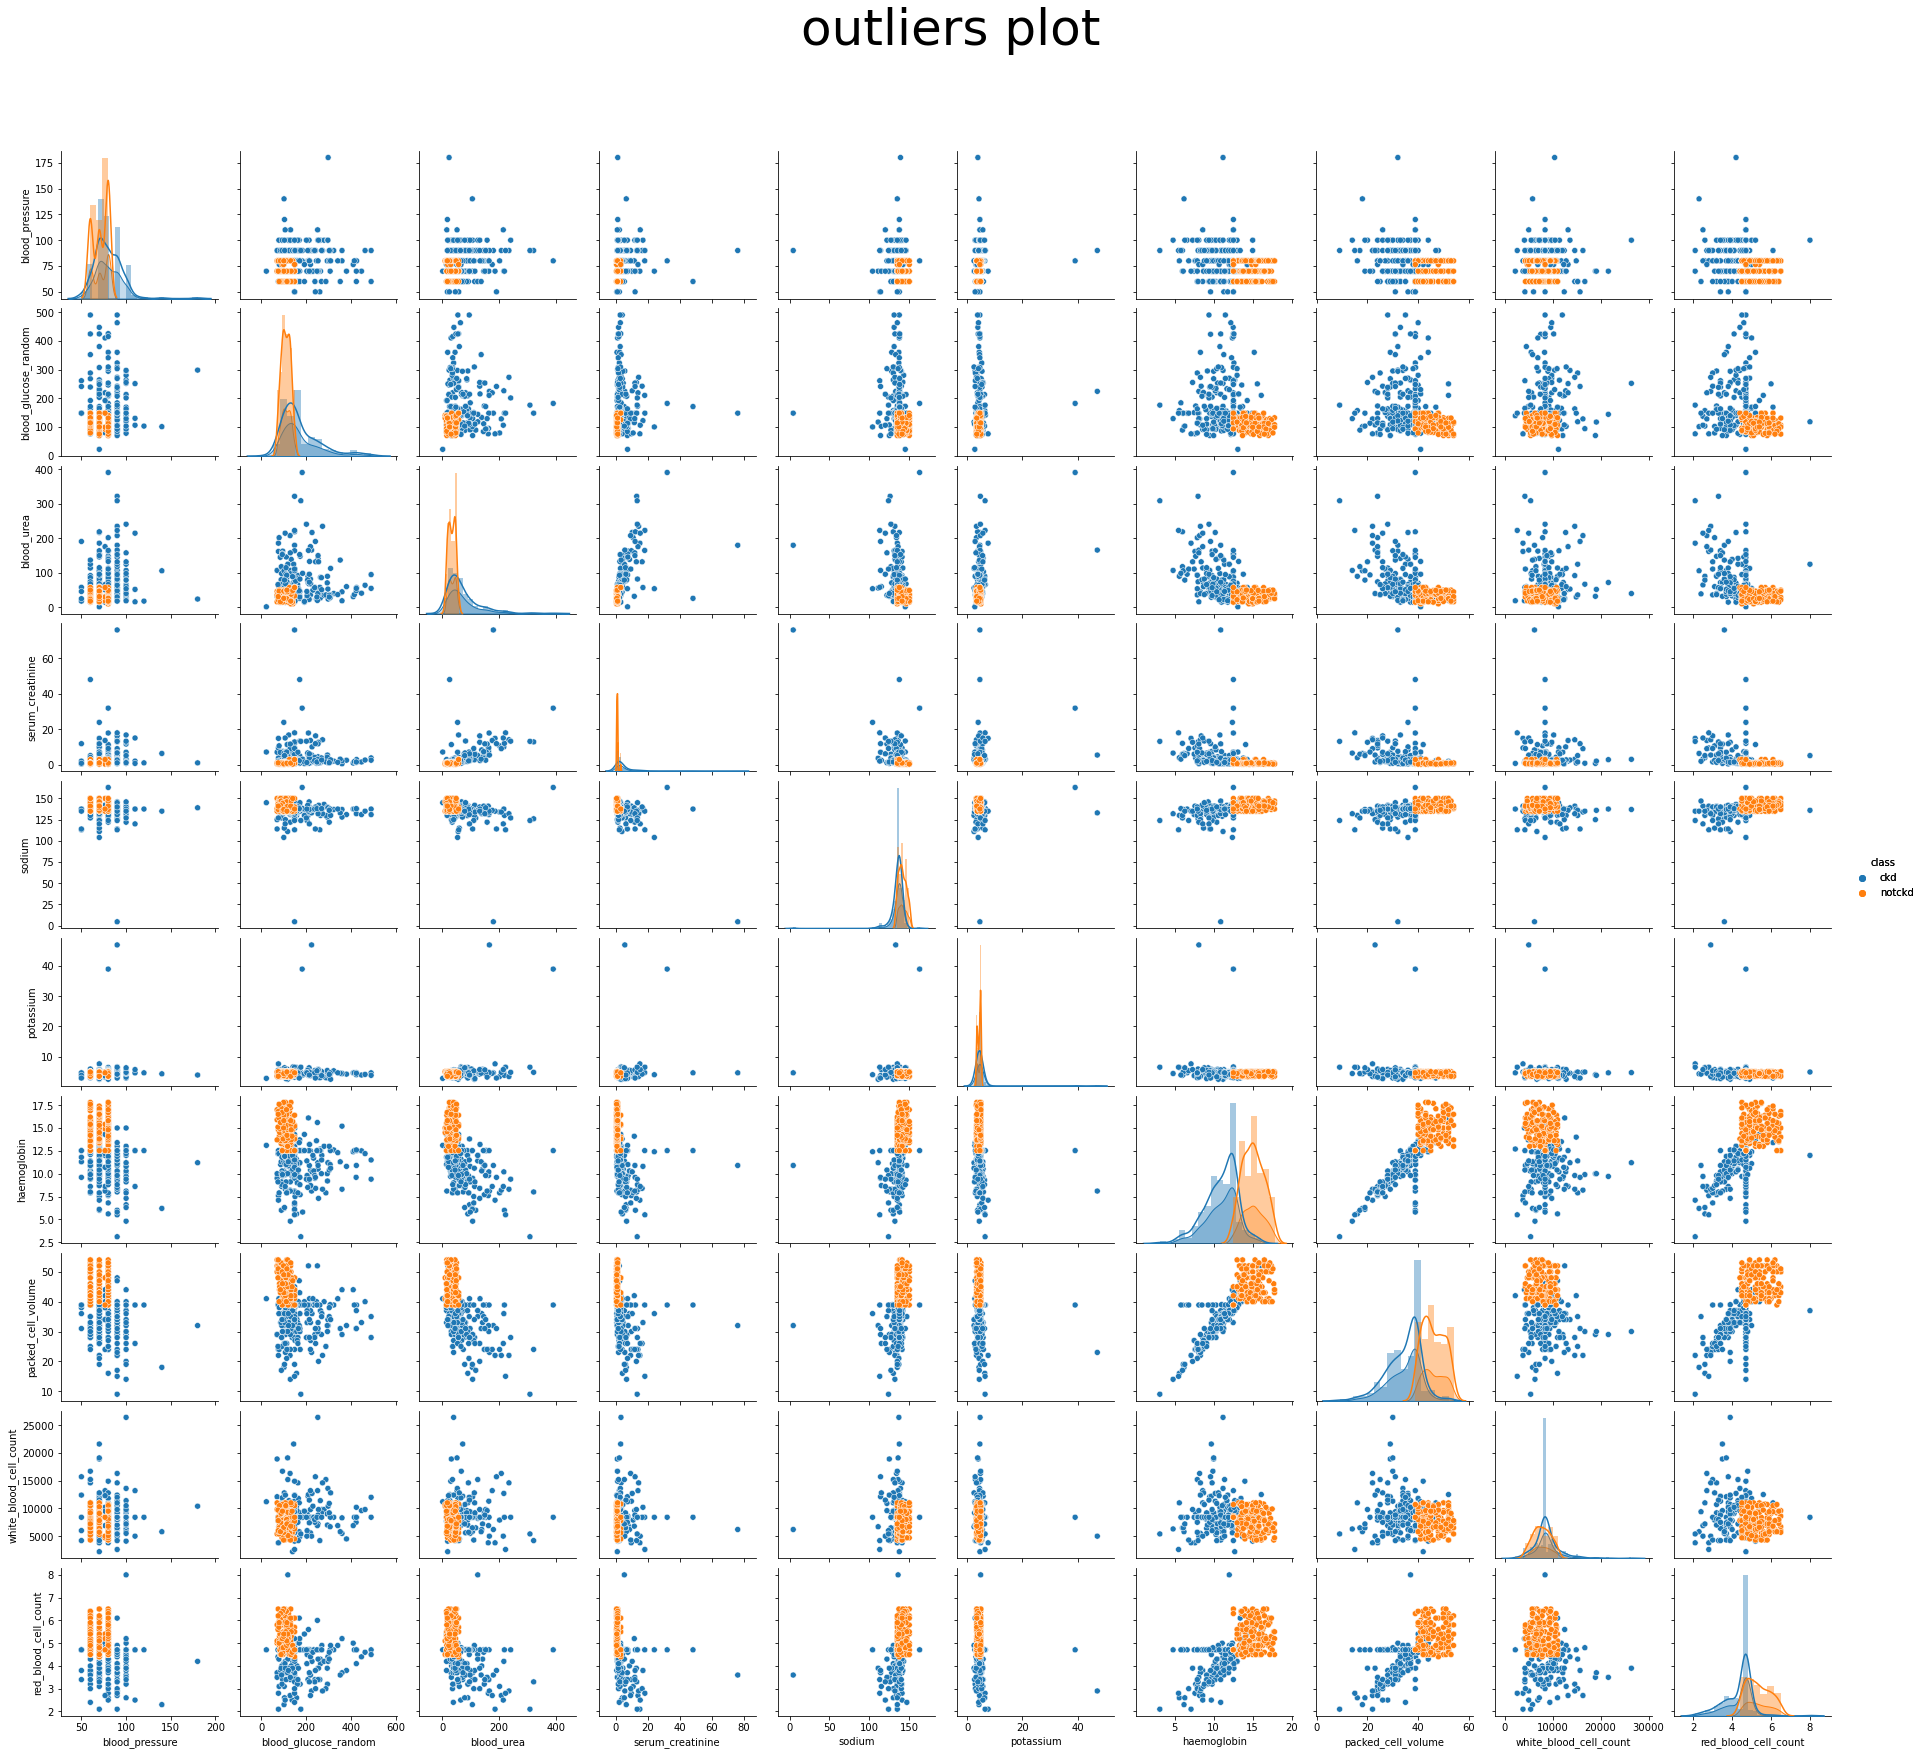

In [36]:
g = sns.pairplot(df, vars =['blood_pressure','blood_glucose_random','blood_urea','serum_creatinine','sodium','potassium','haemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count'],hue = 'class')
g.map_diag(sns.distplot)
g.add_legend()
g.fig.suptitle('outliers plot', fontsize = 50)
g.fig.subplots_adjust(top= 0.9);

In [37]:
def plotBoxPlot(df1, nRows, nGraphPerRow):
    track = [[0]*nGraphPerRow]*nRows
    columnNames = df1.columns
        
    fig, ax = plt.subplots(nrows=nRows, ncols=nGraphPerRow, figsize=(20,10))
       
    row, col, i = 0,0,0
    while i<(len(columnNames)):
        if col<=nGraphPerRow-1:
            sns.boxplot(df[columnNames[i]],ax=ax[row][col])
            col+=1
        else:
            col=0
            row+=1
            i-=1
        i+=1
            
    for j in range(col,nGraphPerRow):
        fig.delaxes(ax[row][j])
    
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

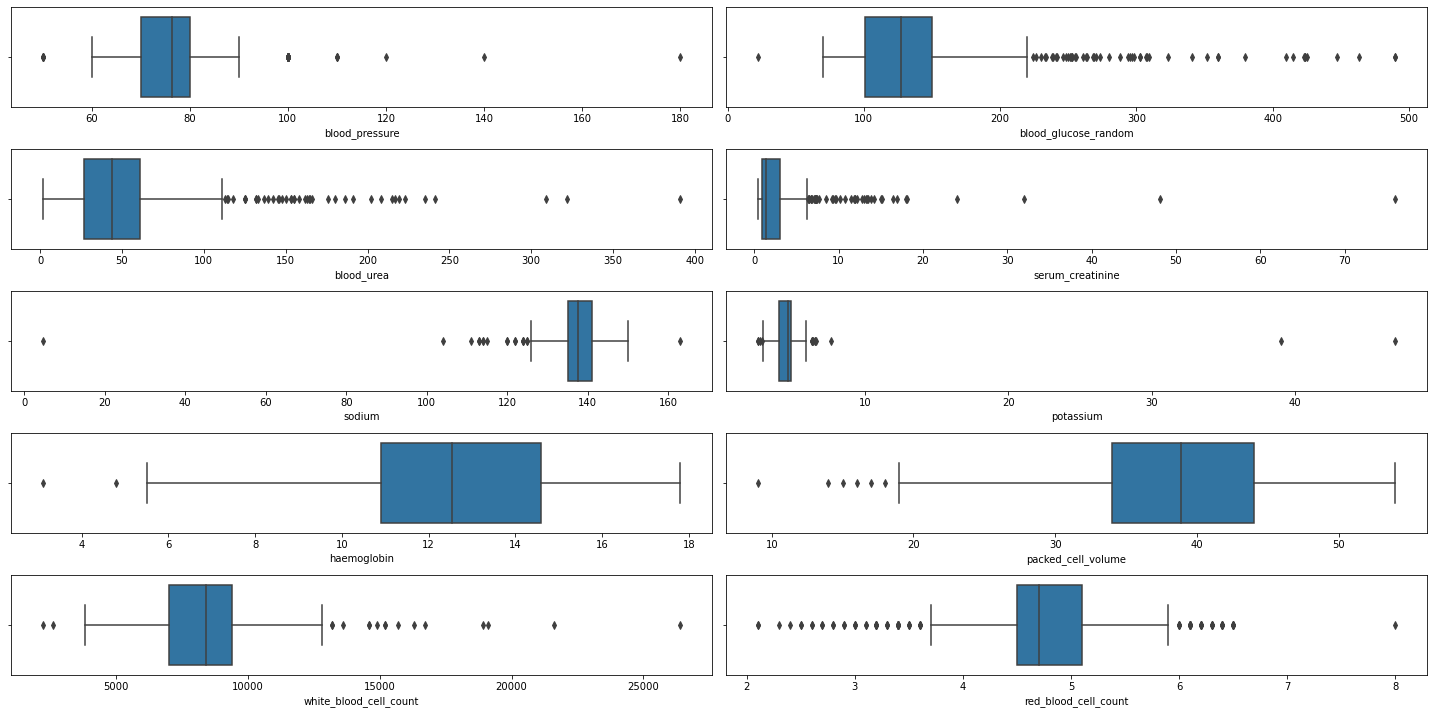

In [38]:
df1 = df[['blood_pressure','blood_glucose_random','blood_urea','serum_creatinine','sodium','potassium','haemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count']]
plotBoxPlot(df1,5,2)

In [39]:
new_df1=df.copy()

In [40]:
for col in num_cols:
    for x in [col]:
        q75,q25 = np.percentile(new_df1.loc[:,x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
        #remplacer les out par nan
        new_df1.loc[new_df1[x]<min,x]=np.NaN
        new_df1.loc[new_df1[x]>max,x]=np.NaN

In [41]:
for col in num_cols:
    new_df1[col] = new_df1[col].replace(to_replace =  np.NaN, value=new_df1[col].mean())

<AxesSubplot:xlabel='haemoglobin'>

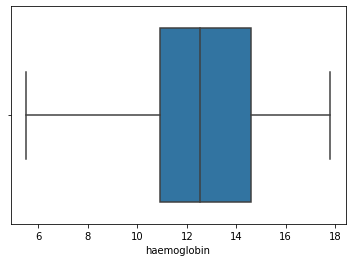

In [42]:
sns.boxplot(x=new_df1["haemoglobin"],fliersize=10,orient="h")

<AxesSubplot:xlabel='potassium'>

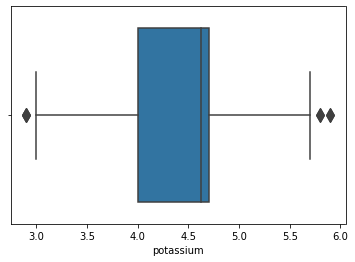

In [43]:
sns.boxplot(x=new_df1["potassium"],fliersize=10,orient="h")

In [44]:
df=new_df1.copy()

## Data Encoding

#### Categorical Data Encoding

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_cols:
    df[col]=le.fit_transform(df[col])

In [46]:
df.head()

age  blood_pressure  specific_gravity  albumin     sugar  \
0  48.000000       80.000000          1.020000      1.0  0.000000   
1  52.656864       74.367392          1.020000      4.0  0.000000   
2  62.000000       80.000000          1.010000      2.0  0.100587   
3  48.000000       70.000000          1.017628      4.0  0.000000   
4  51.000000       80.000000          1.010000      2.0  0.000000   

   red_blood_cells  pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  \
0                1         1                0         0            121.000000   
1                1         1                0         0            148.036517   
2                1         1                0         0            124.404147   
3                1         0                1         0            117.000000   
4                1         1                0         0            106.000000   

   ...  packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0  ...                44.0                  7800.0              5.200000   
1  ...                38.0                  6000.0              4.707435   
2  ...                31.0                  7500.0              4.707435   
3  ...                32.0                  6700.0              3.900000   
4  ...                35.0                  7300.0              4.600000   

   hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0             1                  1                        0         0   
1             0                  0                        0         0   
2             0                  1                        0         1   
3             1                  0                        0         1   
4             0                  0                        0         0   

   pedal_edema  anemia  class  
0            0       0      0  
1            0       0      0  
2            0       1      0  
3            1       1      0  
4            0       0      0  

[5 rows x 25 columns]

In [47]:
df.tail()

age  blood_pressure  specific_gravity   albumin     sugar  \
396  42.000000       70.000000          1.025000  0.000000  0.000000   
397  12.000000       80.000000          1.020000  0.000000  0.000000   
398  17.000000       60.000000          1.025000  0.000000  0.000000   
399  58.000000       80.000000          1.025000  0.000000  0.000000   
400  51.483376       76.469072          1.017408  1.016949  0.450142   

     red_blood_cells  pus_cell  pus_cell_clumps  bacteria  \
396                1         1                0         0   
397                1         1                0         0   
398                1         1                0         0   
399                1         1                0         0   
400                1         1                0         0   

     blood_glucose_random  ...  packed_cell_volume  white_blood_cell_count  \
396             75.000000  ...           54.000000             7800.000000   
397            100.000000  ...           49.000000             6600.000000   
398            114.000000  ...           51.000000             7200.000000   
399            131.000000  ...           53.000000             6800.000000   
400            148.036517  ...           38.884498             8406.122449   

     red_blood_cell_count  hypertension  diabetes_mellitus  \
396              4.765894             0                  0   
397              5.400000             0                  0   
398              5.900000             0                  0   
399              4.765894             0                  0   
400              4.707435             0                  0   

     coronary_artery_disease  appetite  pedal_edema  anemia  class  
396                        0         0            0       0      1  
397                        0         0            0       0      1  
398                        0         0            0       0      1  
399                        0         0            0       0      1  
400                        0         0            0       0      1  

[5 rows x 25 columns]

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      401 non-null    float64
 1   blood_pressure           401 non-null    float64
 2   specific_gravity         401 non-null    float64
 3   albumin                  401 non-null    float64
 4   sugar                    401 non-null    float64
 5   red_blood_cells          401 non-null    int32  
 6   pus_cell                 401 non-null    int32  
 7   pus_cell_clumps          401 non-null    int32  
 8   bacteria                 401 non-null    int32  
 9   blood_glucose_random     401 non-null    float64
 10  blood_urea               401 non-null    float64
 11  serum_creatinine         401 non-null    float64
 12  sodium                   401 non-null    float64
 13  potassium                401 non-null    float64
 14  haemoglobin              4

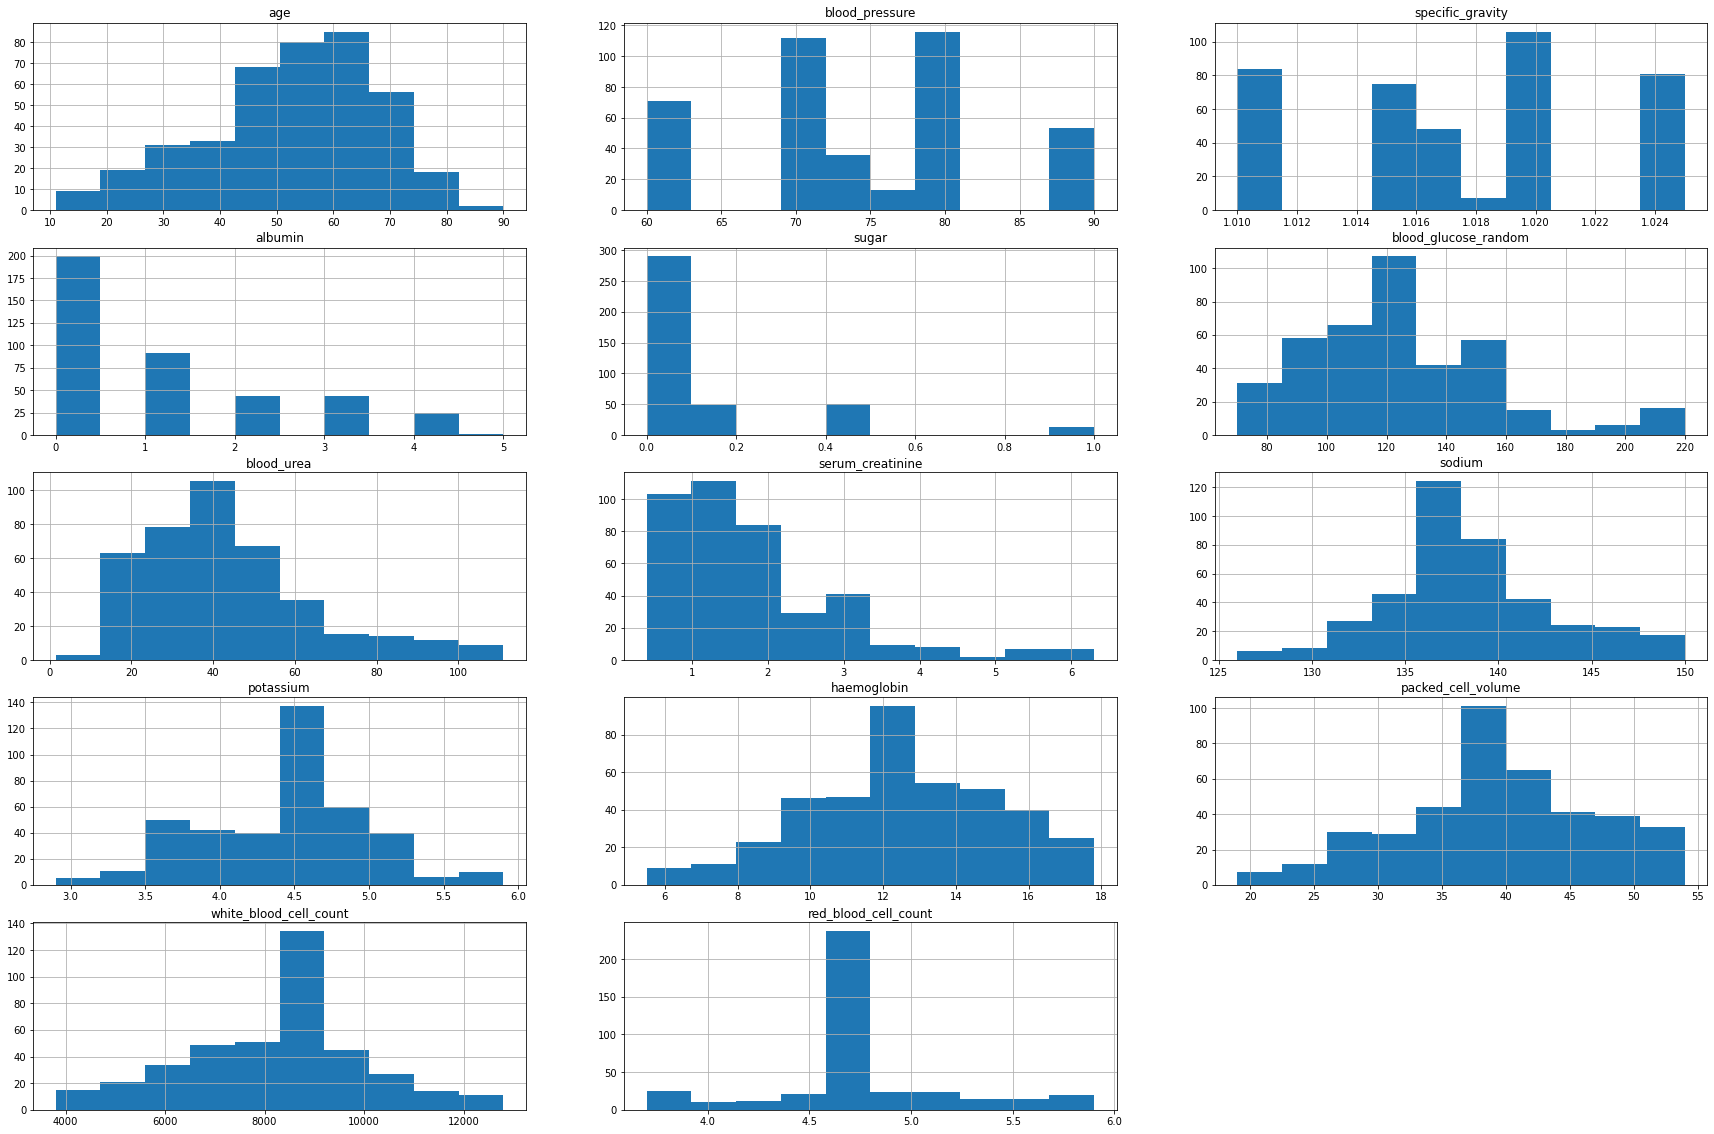

In [49]:
plt.figure(figsize=(30,20))
for i,feature in enumerate(num_cols):
    plt.subplot(5,3,i+1)
    df[feature].hist()
    plt.title(feature)

Observations:

    1.age looks a bit left skewed
    2.Blood gluscose random is right skewed
    3.Blood Urea is also a bit right skewed
    4.Rest of the features are lightly skewed

## Label distribution for Categorical data

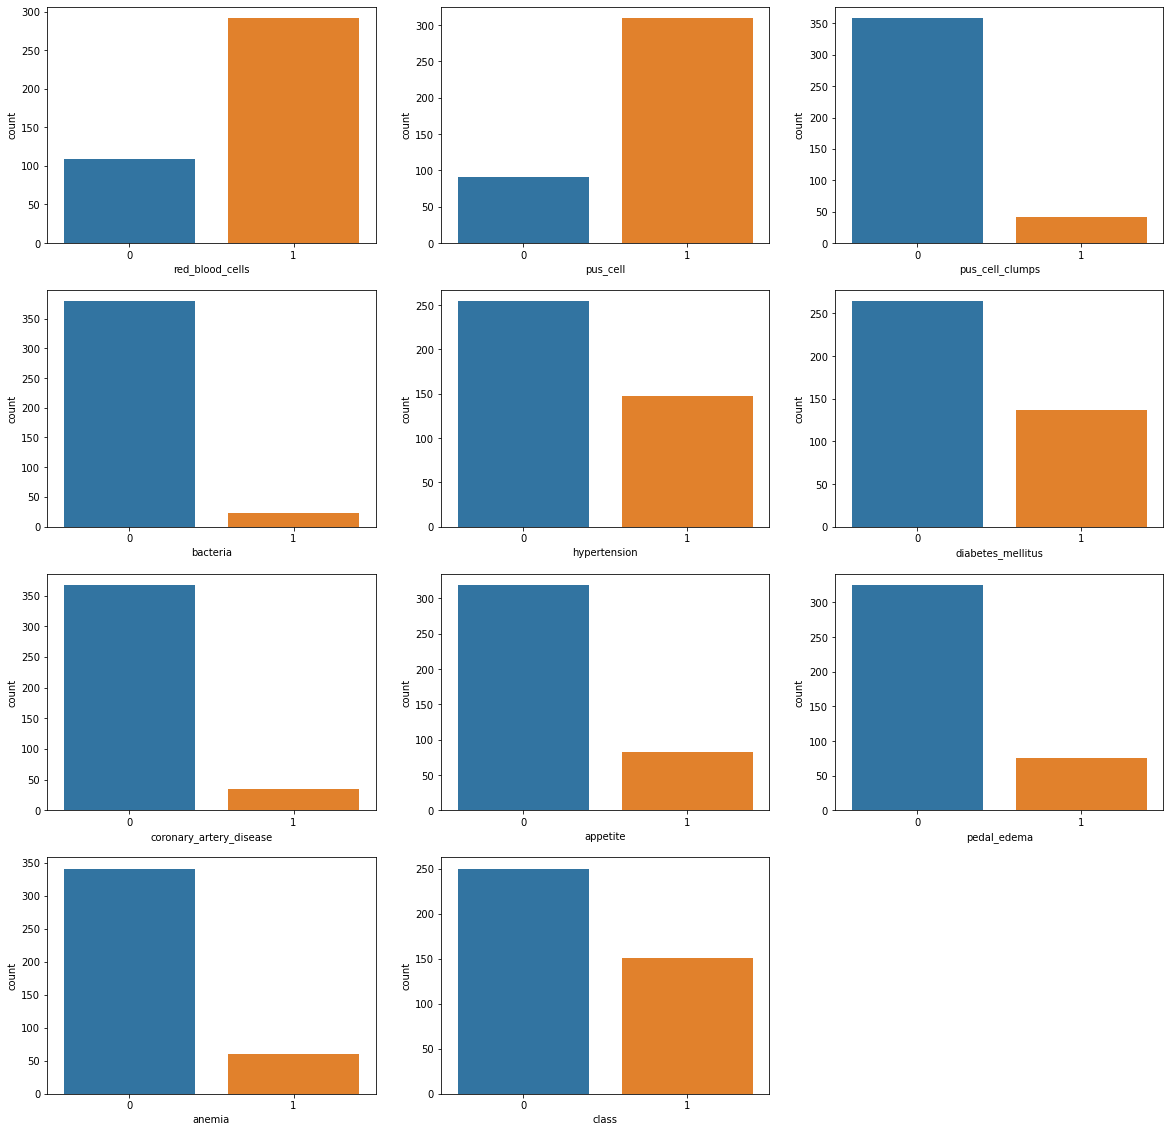

In [50]:
plt.figure(figsize=(20,20))
for i,feature in enumerate(cat_cols):
    plt.subplot(4,3,i+1)
    sns.light_palette("seagreen", as_cmap=True)
    sns.countplot(df[feature])
    


A few features has imbalanced categories. Stratified folds will be necessary while cross validation.

Text(0.5, 1.0, 'target Class')

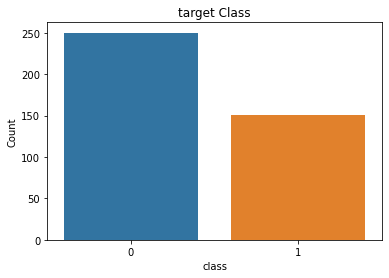

In [51]:
sns.countplot(x='class',data=df)
plt.xlabel("class")
plt.ylabel("Count")
plt.title("target Class")

## Data Standardization

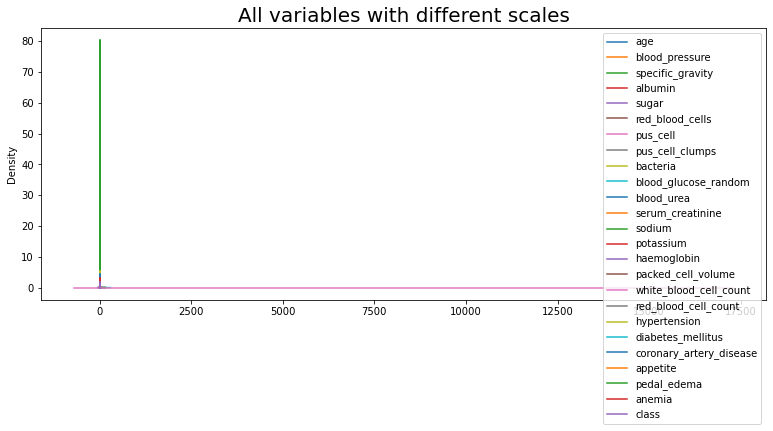

In [52]:
df.plot(kind='density',figsize=(13,5))
plt.title('All variables with different scales', fontsize=20)
plt.show()

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(df.values.reshape(-1, 1))

array([[-0.18254846],
       [-0.16286348],
       [-0.21144847],
       ...,
       [-0.21207593],
       [-0.21207593],
       [-0.21146077]])

In [54]:
def min_max_scaling(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm
    
# call the min_max_scaling function
df_normalized = min_max_scaling(df)

df_normalized.head()


age  blood_pressure  specific_gravity  albumin     sugar  \
0  0.468354        0.666667          0.666667      0.2  0.000000   
1  0.527302        0.478913          0.666667      0.8  0.000000   
2  0.645570        0.666667          0.000000      0.4  0.100587   
3  0.468354        0.333333          0.508559      0.8  0.000000   
4  0.506329        0.666667          0.000000      0.4  0.000000   

   red_blood_cells  pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  \
0              1.0       1.0              0.0       0.0              0.340000   
1              1.0       1.0              0.0       0.0              0.520243   
2              1.0       1.0              0.0       0.0              0.362694   
3              1.0       0.0              1.0       0.0              0.313333   
4              1.0       1.0              0.0       0.0              0.240000   

   ...  packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0  ...            0.714286                0.444444              0.681818   
1  ...            0.542857                0.244444              0.457925   
2  ...            0.342857                0.411111              0.457925   
3  ...            0.371429                0.322222              0.090909   
4  ...            0.457143                0.388889              0.409091   

   hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0           1.0                1.0                      0.0       0.0   
1           0.0                0.0                      0.0       0.0   
2           0.0                1.0                      0.0       1.0   
3           1.0                0.0                      0.0       1.0   
4           0.0                0.0                      0.0       0.0   

   pedal_edema  anemia  class  
0          0.0     0.0    0.0  
1          0.0     0.0    0.0  
2          0.0     1.0    0.0  
3          1.0     1.0    0.0  
4          0.0     0.0    0.0  

[5 rows x 25 columns]

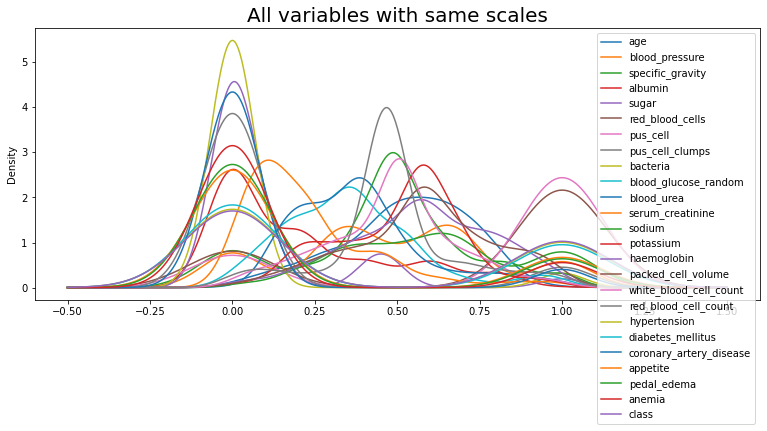

In [55]:
df_normalized.plot(kind='density',figsize=(13,5))
plt.title('All variables with same scales', fontsize=20)
plt.show()

## Feature Selection

In [56]:
df.corr()

age  blood_pressure  specific_gravity   albumin  \
age                      1.000000        0.105812         -0.226297  0.204173   
blood_pressure           0.105812        1.000000         -0.151967  0.124659   
specific_gravity        -0.226297       -0.151967          1.000000 -0.442546   
albumin                  0.204173        0.124659         -0.442546  1.000000   
sugar                    0.201457        0.131253         -0.187736  0.230440   
red_blood_cells         -0.107507       -0.168388          0.338700 -0.293515   
pus_cell                -0.156095       -0.139687          0.309411 -0.504985   
pus_cell_clumps          0.150215        0.043142         -0.259789  0.399690   
bacteria                 0.063315        0.097542         -0.215398  0.367828   
blood_glucose_random     0.168480        0.121994         -0.301623  0.242649   
blood_urea               0.261632        0.118166         -0.284374  0.302949   
serum_creatinine         0.264969        0.143906         -0.420161  0.437084   
sodium                  -0.123344       -0.137612          0.364043 -0.399910   
potassium                0.069518        0.013242         -0.011553  0.083858   
haemoglobin             -0.233374       -0.192935          0.523182 -0.537479   
packed_cell_volume      -0.278790       -0.169690          0.535707 -0.525073   
white_blood_cell_count   0.146442        0.032478         -0.159834  0.079341   
red_blood_cell_count    -0.206802       -0.176985          0.360188 -0.341873   
hypertension             0.377831        0.144129         -0.367138  0.481375   
diabetes_mellitus        0.347734        0.174967         -0.392158  0.377797   
coronary_artery_disease  0.235101        0.036948         -0.153717  0.236718   
appetite                 0.173022        0.105817         -0.235378  0.330455   
pedal_edema              0.125958        0.061900         -0.228452  0.440764   
anemia                   0.045684        0.168474         -0.207675  0.282243   
class                   -0.309427       -0.247873          0.699717 -0.597997   

                            sugar  red_blood_cells  pus_cell  pus_cell_clumps  \
age                      0.201457        -0.107507 -0.156095         0.150215   
blood_pressure           0.131253        -0.168388 -0.139687         0.043142   
specific_gravity        -0.187736         0.338700  0.309411        -0.259789   
albumin                  0.230440        -0.293515 -0.504985         0.399690   
sugar                    1.000000        -0.199216 -0.124266         0.069389   
red_blood_cells         -0.199216         1.000000  0.231040        -0.102206   
pus_cell                -0.124266         0.231040  1.000000        -0.475756   
pus_cell_clumps          0.069389        -0.102206 -0.475756         1.000000   
bacteria                 0.068955        -0.123569 -0.313952         0.275228   
blood_glucose_random     0.274844        -0.245385 -0.221342         0.175470   
blood_urea               0.200769        -0.239834 -0.262296         0.187458   
serum_creatinine         0.212964        -0.242590 -0.307748         0.243890   
sodium                  -0.168055         0.289667  0.265742        -0.157228   
potassium                0.026416        -0.060230 -0.015511         0.037169   
haemoglobin             -0.279212         0.382623  0.427981        -0.259349   
packed_cell_volume      -0.180077         0.320971  0.398753        -0.275207   
white_blood_cell_count   0.073894        -0.057980 -0.001411         0.074618   
red_blood_cell_count    -0.087061         0.217138  0.275308        -0.205668   
hypertension             0.324254        -0.268035 -0.316811         0.196104   
diabetes_mellitus        0.364241        -0.280824 -0.275060         0.165721   
coronary_artery_disease  0.186026        -0.135985 -0.198435         0.188240   
appetite                 0.234084        -0.246135 -0.301016         0.190032   
pedal_edema              0.148837        -0.233715 -0.345649

<AxesSubplot:>

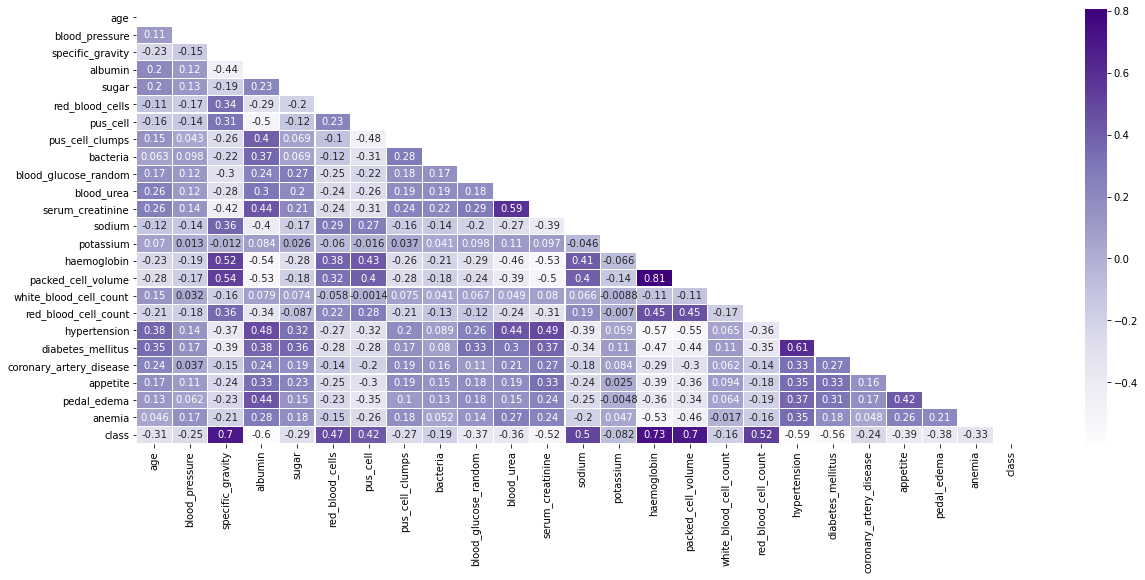

In [57]:
plt.figure(figsize=(20,8))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot=True, linewidths=0.2, mask=mask,cmap="Purples")

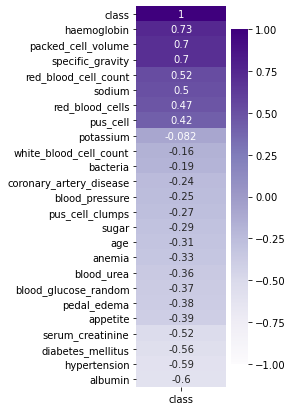

In [58]:
plt.figure(figsize=(2, 7))
heatmap = sns.heatmap(df.corr()[['class']]
                      .sort_values(by='class', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='Purples')

In [59]:
# By using this function we can select correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [60]:
corr_features = correlation(df, 0.75)
corr_features

{'packed_cell_volume'}

In [61]:
#and now we drop 
df=df.drop(corr_features,axis=1)
df.head()

age  blood_pressure  specific_gravity  albumin     sugar  \
0  48.000000       80.000000          1.020000      1.0  0.000000   
1  52.656864       74.367392          1.020000      4.0  0.000000   
2  62.000000       80.000000          1.010000      2.0  0.100587   
3  48.000000       70.000000          1.017628      4.0  0.000000   
4  51.000000       80.000000          1.010000      2.0  0.000000   

   red_blood_cells  pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  \
0                1         1                0         0            121.000000   
1                1         1                0         0            148.036517   
2                1         1                0         0            124.404147   
3                1         0                1         0            117.000000   
4                1         1                0         0            106.000000   

   ...  haemoglobin  white_blood_cell_count  red_blood_cell_count  \
0  ...         15.4                  7800.0              5.200000   
1  ...         11.3                  6000.0              4.707435   
2  ...          9.6                  7500.0              4.707435   
3  ...         11.2                  6700.0              3.900000   
4  ...         11.6                  7300.0              4.600000   

   hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0             1                  1                        0         0   
1             0                  0                        0         0   
2             0                  1                        0         1   
3             1                  0                        0         1   
4             0                  0                        0         0   

   pedal_edema  anemia  class  
0            0       0      0  
1            0       0      0  
2            0       1      0  
3            1       1      0  
4            0       0      0  

[5 rows x 24 columns]

## Feature Selection with Recursive Feature Elimination (RFECV)


In recursive feature elimination, we repeatedly train a model multiple times and each time we remove the least important feature from model determined by coef_ or feature_importance_ attribute of the model. We do this process until the model performance become worse. At last we were left with the features that are most important.


Optimal number of features : 16


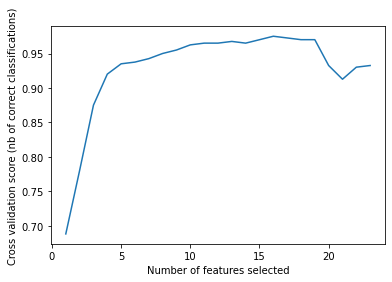

[1 1 1 1 1 1 1 7 4 3 2 1 1 1 1 6 1 1 1 5 1 1 8]


In [62]:
# rfecv for classification
y = df['class']
X = df.loc[:, df.columns != 'class']
svc = SVC(kernel="linear")

rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(3),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plotting number of features and cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()
print(rfecv.ranking_)

In [63]:
features_kept = pd.DataFrame({'columns': X.columns,
                             'Kept': rfecv.support_})
features_kept

columns   Kept
0                       age   True
1            blood_pressure   True
2          specific_gravity   True
3                   albumin   True
4                     sugar   True
5           red_blood_cells   True
6                  pus_cell   True
7           pus_cell_clumps  False
8                  bacteria  False
9      blood_glucose_random  False
10               blood_urea  False
11         serum_creatinine   True
12                   sodium   True
13                potassium   True
14              haemoglobin   True
15   white_blood_cell_count  False
16     red_blood_cell_count   True
17             hypertension   True
18        diabetes_mellitus   True
19  coronary_artery_disease  False
20                 appetite   True
21              pedal_edema   True
22                   anemia  False

In [64]:
X_new_df = X.iloc[:, rfecv.support_]
X_new_df.head()

age  blood_pressure  specific_gravity  albumin     sugar  \
0  48.000000       80.000000          1.020000      1.0  0.000000   
1  52.656864       74.367392          1.020000      4.0  0.000000   
2  62.000000       80.000000          1.010000      2.0  0.100587   
3  48.000000       70.000000          1.017628      4.0  0.000000   
4  51.000000       80.000000          1.010000      2.0  0.000000   

   red_blood_cells  pus_cell  serum_creatinine      sodium  potassium  \
0                1         1               1.2  137.528754   4.627244   
1                1         1               0.8  137.528754   4.627244   
2                1         1               1.8  137.528754   4.627244   
3                1         0               3.8  138.620184   4.409624   
4                1         1               1.4  137.528754   4.627244   

   haemoglobin  red_blood_cell_count  hypertension  diabetes_mellitus  \
0         15.4              5.200000             1                  1   
1         11.3              4.707435             0                  0   
2          9.6              4.707435             0                  1   
3         11.2              3.900000             1                  0   
4         11.6              4.600000             0                  0   

   appetite  pedal_edema  
0         0            0  
1         0            0  
2         1            0  
3         1            1  
4         0            0

### chi2 

#### Internally this class is going to check that whether p-value is less than 0.05 or not based on that,it will order all the features, we are keeping the 14 most relevant features.

In [65]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

ind_col=[col for col in df.columns if col!='class']
dep_col='class'

e=df[ind_col]
f=df[dep_col] 

ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(e,f)

datascores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])

dfcolumns=pd.DataFrame(e.columns)

features_rank=pd.concat([dfcolumns,datascores],axis=1)

features_rank.columns=['Features','Score']

# features_rank.nlargest(14,'Score')  --->  fetch largest 14 values of Score column   

selected_columns=features_rank.nlargest(14,'Score')['Features'].values
data_new=df[selected_columns]
data_new


white_blood_cell_count  blood_urea  blood_glucose_random   albumin  \
0               7800.000000   36.000000            121.000000  1.000000   
1               6000.000000   18.000000            148.036517  4.000000   
2               7500.000000   53.000000            124.404147  2.000000   
3               6700.000000   56.000000            117.000000  4.000000   
4               7300.000000   26.000000            106.000000  2.000000   
..                      ...         ...                   ...       ...   
396             7800.000000   31.000000             75.000000  0.000000   
397             6600.000000   26.000000            100.000000  0.000000   
398             7200.000000   50.000000            114.000000  0.000000   
399             6800.000000   18.000000            131.000000  0.000000   
400             8406.122449   57.425722            148.036517  1.016949   

           age  haemoglobin  hypertension  serum_creatinine  \
0    48.000000    15.400000             1          1.200000   
1    52.656864    11.300000             0          0.800000   
2    62.000000     9.600000             0          1.800000   
3    48.000000    11.200000             1          3.800000   
4    51.000000    11.600000             0          1.400000   
..         ...          ...           ...               ...   
396  42.000000    16.500000             0          1.200000   
397  12.000000    15.800000             0          0.600000   
398  17.000000    14.200000             0          1.000000   
399  58.000000    15.800000             0          1.100000   
400  51.483376    12.526437             0          3.072454   

     diabetes_mellitus  appetite  pedal_edema  anemia  blood_pressure  \
0                    1         0            0       0       80.000000   
1                    0         0            0       0       74.367392   
2                    1         1            0       1       80.000000   
3                    0         1            1       1       70.000000   
4                    0         0            0       0       80.000000   
..                 ...       ...          ...     ...             ...   
396                  0         0            0       0       70.000000   
397                  0         0            0       0       80.000000   
398                  0         0            0       0       60.000000   
399                  0         0            0       0       80.000000   
400                  0         0            0       0       76.469072   

     pus_cell_clumps  
0                  0  
1                  0  
2                  0  
3                  1  
4                  0  
..               ...  
396                0  
397                0  
398                0  
399                0  
400                0  

[401 rows x 14 columns]

In [66]:
X =  df.drop(['class'], axis=1)
y = df['class']

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
len(X_train)

320

In [70]:
len(X_test)

81

## KNN: K-Nearest Neighbors


In [71]:
#Default values and Minkovski distance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.98125
Test Accuracy of KNN is 0.9506172839506173 

Confusion Matrix :- 
[[55  2]
 [ 2 22]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        57
           1       0.92      0.92      0.92        24

    accuracy                           0.95        81
   macro avg       0.94      0.94      0.94        81
weighted avg       0.95      0.95      0.95        81



In [72]:
##Grid search to find the best K 

In [73]:
from sklearn.model_selection import GridSearchCV
n_neighbors = list(range(1,25))
p=[1,2] #p = 1 manhattan_distance/p=2 euclidean_distance
hyperparameters = dict(n_neighbors=n_neighbors, p=p)
knn_2 = KNeighborsClassifier()
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
best_model = clf.fit(X_train, y_train)
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best p: 1
Best n_neighbors: 6


In [74]:
best_parameters = clf.best_params_
print(best_parameters)

{'n_neighbors': 6, 'p': 1}


In [75]:
best_result = clf.best_score_
print(best_result)

0.990625


In [76]:
knn = KNeighborsClassifier(6,p=1)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [77]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
      .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
      .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.95


In [78]:
knn.score(X_train, y_train)

0.990625

In [79]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))

[[56  1]
 [ 3 21]]


<AxesSubplot:>

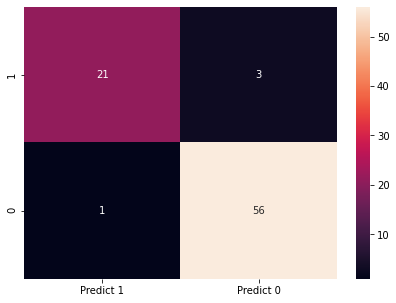

In [80]:
cm = metrics.confusion_matrix(y_test, y_pred_knn, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        57
           1       0.95      0.88      0.91        24

    accuracy                           0.95        81
   macro avg       0.95      0.93      0.94        81
weighted avg       0.95      0.95      0.95        81



In [82]:
from sklearn.model_selection import GridSearchCV
n_neighbors = list(range(1,320))
p=[1,2] #p = 1 manhattan_distance/p=2 euclidean_distance
hyperparameters = dict(n_neighbors=n_neighbors, p=p)
knn_2 = KNeighborsClassifier()
clf = GridSearchCV(knn_2, hyperparameters, cv=20)
best_model = clf.fit(X_train, y_train)
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best p: 1
Best n_neighbors: 4


# DecisionTreeClassifier

In [83]:
def dtree_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(2, 15)}
    cv =model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # decision tree model
    dtree = DecisionTreeClassifier()
    
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree, param_grid, cv=cv, n_jobs=-1, scoring='accuracy')
    #fit model to data
    dtree_gscv.fit(X, y)
    
    return dtree_gscv.best_params_

In [84]:
from sklearn.tree import DecisionTreeClassifier
dtree_grid_search(X_train, y_train)

{'criterion': 'entropy', 'max_depth': 6}

In [85]:
dTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
dTree.fit(X_train, y_train)

print('the accuarcy of training set is ',dTree.score(X_train,y_train))
print('the accuarcy of testing set is ',dTree.score(X_test,y_test))

y_pred_dtree = dTree.predict(X_test)

print(metrics.classification_report(y_test, y_pred_dtree))

the accuarcy of training set is  1.0
the accuarcy of testing set is  0.9629629629629629
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        57
           1       1.00      0.88      0.93        24

    accuracy                           0.96        81
   macro avg       0.97      0.94      0.95        81
weighted avg       0.96      0.96      0.96        81



<AxesSubplot:>

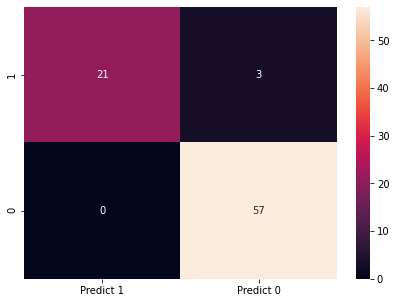

In [86]:
cm = metrics.confusion_matrix(y_test, y_pred_dtree, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

## Random Forest

In [87]:
def rf_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = { 
    'n_estimators': [5,10,20,40,50,60,70,80,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }
    cv =model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # Random Forest model
    rf = RandomForestClassifier()
    
    #use gridsearch to test all values
    rf_gscv = GridSearchCV(rf, param_grid, cv=cv, n_jobs=-1, scoring='accuracy')
    #fit model to data
    rf_gscv.fit(X, y)
    
    return rf_gscv.best_params_

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf_grid_search(X_train, y_train)

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 80}

In [89]:
rfcl = RandomForestClassifier(n_estimators=80, max_features='log2', max_depth=7, criterion='gini')
rfcl = rfcl.fit(X_train, y_train)

y_pred_rf = rfcl.predict(X_test)

print('the accuracy of training set is ',rfcl.score(X_train,y_train))
print('the accuracy of testing set is ',rfcl.score(X_test,y_test))

print(metrics.classification_report(y_test, y_pred_rf))

the accuracy of training set is  1.0
the accuracy of testing set is  0.9629629629629629
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        57
           1       1.00      0.88      0.93        24

    accuracy                           0.96        81
   macro avg       0.97      0.94      0.95        81
weighted avg       0.96      0.96      0.96        81



In [90]:
rf_tacc = rfcl.score(X_test,y_test)
rf_train_acc = rfcl.score(X_train, y_train)

<AxesSubplot:>

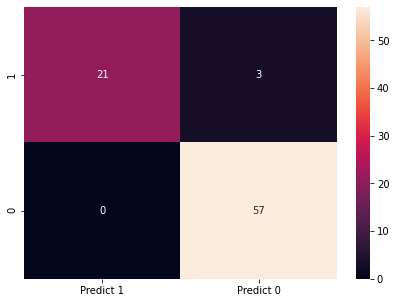

In [91]:
cm = metrics.confusion_matrix(y_test, y_pred_rf, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

## Support Vector Machine

In [94]:
def svm_grid_search(X, y):
    #create a dictionary of all values we want to test
    param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001, 0.4, 0.2, 0.8],'kernel': ['rbf', 'poly', 'sigmoid','linear']}
    cv =model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    svm = SVC()
    
    #use gridsearch to test all values
    svm_gscv = RandomizedSearchCV(estimator = svm,
                           param_distributions = param_grid,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
    #fit model to data
    svm_gscv.fit(X, y)
    
    return svm_gscv.best_params_

In [95]:
from sklearn.svm import SVC  
from sklearn.model_selection import RandomizedSearchCV
svm_grid_search(X_train, y_train)


{'kernel': 'poly', 'gamma': 0.4, 'C': 0.1}

In [96]:
from sklearn import svm
svm = SVC(gamma=0.1, C=1, kernel='sigmoid', probability=True)

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print('the accuarcy on the training set is ',svm.score(X_train, y_train))
print('the accuarcy on the testing set is ',svm.score(X_test, y_test))

print(metrics.classification_report(y_test, y_pred_svm))

the accuarcy on the training set is  0.975
the accuarcy on the testing set is  0.9876543209876543
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       1.00      0.96      0.98        24

    accuracy                           0.99        81
   macro avg       0.99      0.98      0.99        81
weighted avg       0.99      0.99      0.99        81



<AxesSubplot:>

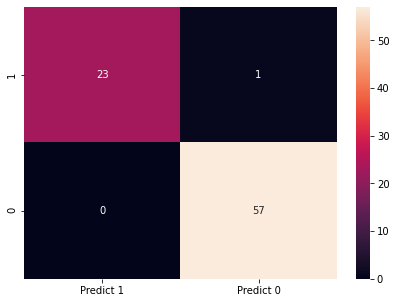

In [97]:
cm = metrics.confusion_matrix(y_test, y_pred_svm, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

## MODEL COMPARISON

In [98]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Support Vector Machine '],
    'Score' : [knn.score(X_train, y_train),dTree.score(X_test,y_test),rfcl.score(X_test,y_test),svm.score(X_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)

Model     Score
0                       KNN  0.990625
3   Support Vector Machine   0.987654
1  Decision Tree Classifier  0.962963
2  Random Forest Classifier  0.962963

In [99]:
import plotly.express as px

In [100]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')

In [101]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Support Vector Machine '],
    'Score' : [accuracy_score(y_train, knn.predict(X_train)),dTree.score(X_test,y_test),rfcl.score(X_test,y_test),svm.score(X_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)

Model     Score
0                       KNN  0.990625
3   Support Vector Machine   0.987654
1  Decision Tree Classifier  0.962963
2  Random Forest Classifier  0.962963